<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/COURSE_8_MODULE_5_Practice_Assignment_Part1_jupyterlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia**

Estimated time needed: **40** minutes


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
    </li>
    <li>
        <a href="#Dataset">Dataset</a>
    </li>
    <li><a href="#Importing Dataset">Importing Dataset</a></li>
    <li><a href="#Practice Tasks">Practice Tasks</a></li>
   


---


# Objectives

After completing this lab you will be able to:

 - Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts


---


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [1]:
%pip install seaborn
%pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [5]:
import pandas as pd
import requests
from io import StringIO

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

# Fetch the CSV data from the URL
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    # Read the CSV data into a pandas dataframe
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print('Data read into a pandas dataframe!')
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")



Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [6]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [7]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [8]:
#data type
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [9]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


### Step-by-Step Explanation

#### `pd.to_datetime(df['Date'])`:
- Converts the `Date` column into a `datetime` object.
- If the column contains dates as strings (e.g., `"2023-01-01"`), this step converts them to proper date formats that Python can understand.

#### `.dt` accessor:
- Once the column is converted to `datetime`, the `.dt` accessor provides access to date-specific attributes like `year`, `month`, `day`, etc.

#### `.dt.year`:
- Extracts the year from each date in the `Date` column (e.g., from `"2023-01-01"`, it extracts `2023`).

#### `.dt.month`:
- Extracts the month from each date in the `Date` column (e.g., from `"2023-01-01"`, it extracts `1` for January).

#### `df['Year']` and `df['Month']`:
- Create two new columns in the DataFrame:
  - **Year**: To store the extracted year.
  - **Month**: To store the extracted month.

---

### Example Input and Output

#### Input DataFrame (`df['Date']`):
| Date       |
|------------|
| 2023-01-01 |
| 2023-02-15 |
| 2023-03-20 |

#### Output DataFrame After Running the Code:
| Date       | Year | Month |
|------------|------|-------|
| 2023-01-01 | 2023 | 1     |
| 2023-02-15 | 2023 | 2     |
| 2023-03-20 | 2023 | 3     |

---

### Use Case
This process is helpful for:

- **Time-series analysis**: Breaking down data into specific years or months.
- **Grouping and aggregation**: Analyzing trends over specific time periods like months or years.


**Verify the columns again**


In [12]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


<details>
    <summary>Click here for Solution</summary>

```python
    df.dtypes
```

</details>


---


In [13]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


## Practice Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


<details>
    <summary>Click here for a Hint</summary>
You will be required to group the year for 'Estimated_fire_area' (taking its mean)<br>Then use df.plot() on it to create a line graph

</details>


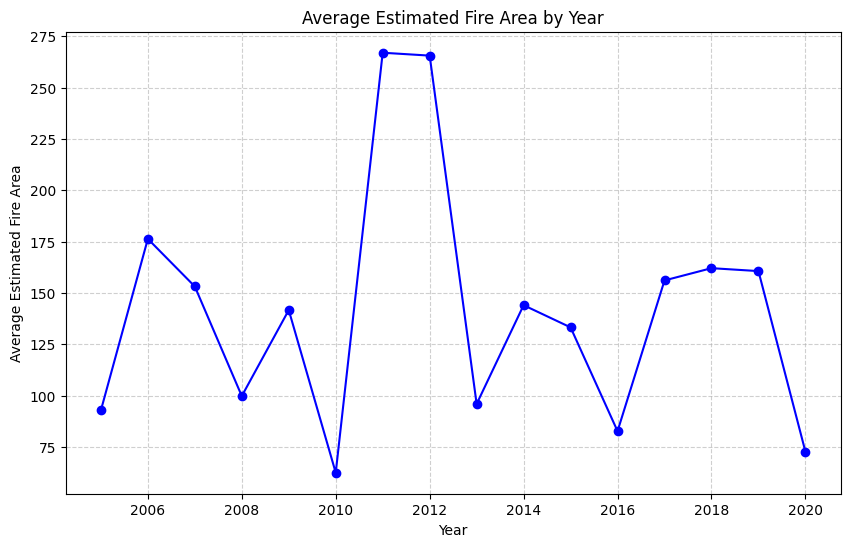

In [25]:
import matplotlib.pyplot as plt

# Group the data by 'Year' and calculate the mean of 'Estimated_fire_area'
line_data = df.groupby('Year')['Estimated_fire_area'].mean()

# Convert the resulting Series into a DataFrame for easier plotting
line_data = line_data.reset_index()

# Create a line plot of 'Year' vs 'Estimated_fire_area'
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
plt.plot(line_data['Year'], line_data['Estimated_fire_area'], marker='o', linestyle='-', color='b')

# Add axis labels
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Average Estimated Fire Area')  # Label for the y-axis

# Add a title to the plot
plt.title('Average Estimated Fire Area by Year')

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()



In [27]:
# Check the generated dataframe
line_data.head()

,Year,Estimated_fire_area
0,2005,92.770501
1,2006,176.289434
2,2007,153.112464
3,2008,99.758968
4,2009,141.624955


<details>
    <summary>Click here for Solution</summary>

```python
    plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby('Year')['Estimated_fire_area'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()
```

</details>


---


### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


<details>
    <summary>Click here for a Hint</summary>
You will be required to group the year and month for 'Estimated_fire_area' (taking its mean)<br>Then use df.plot() on it to create a line graph

</details>


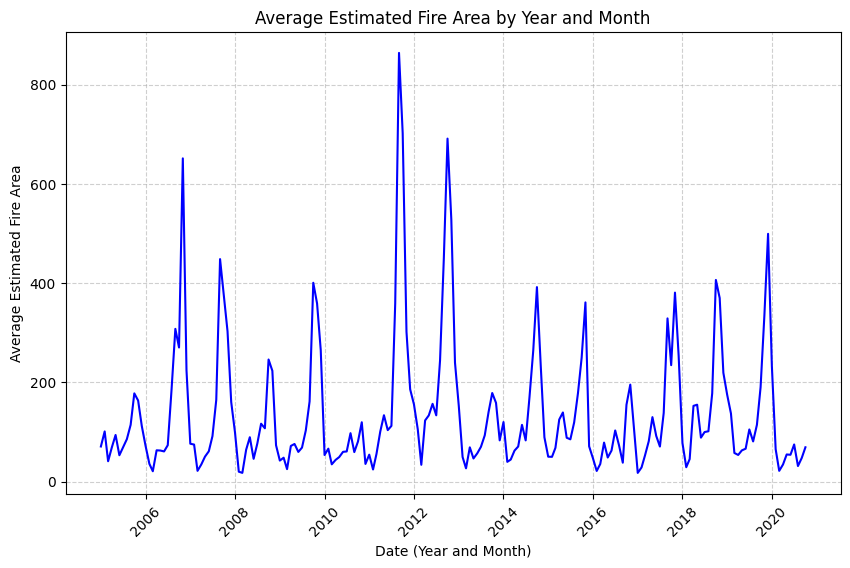

In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Year' and 'Month' and calculate the mean of 'Estimated_fire_area'
line_data2 = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

# Convert the resulting Series into a DataFrame
line_data2 = line_data2.reset_index()

# Combine 'Year' and 'Month' into a single datetime column for better visualization
line_data2['Date'] = pd.to_datetime(line_data2[['Year', 'Month']].assign(Day=1))  # Assume the first day of the month

# Create a line plot with 'Date' as the x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(line_data2['Date'], line_data2['Estimated_fire_area'], linestyle='-', color='b')

# Add axis labels
plt.xlabel('Date (Year and Month)')  # Label for the x-axis
plt.ylabel('Average Estimated Fire Area')  # Label for the y-axis

# Add a title to the plot
plt.title('Average Estimated Fire Area by Year and Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


In [39]:
# Check the source dataframe
line_data2.head()

,Year,Month,Estimated_fire_area,Date
0,2005,1,70.619908,2005-01-01
1,2005,2,101.018747,2005-02-01
2,2005,3,40.901576,2005-03-01
3,2005,4,69.305388,2005-04-01
4,2005,5,93.834520,2005-05-01


<details>
    <summary>Click here for Solution</summary>

```python
    # Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year, Month')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()
```

</details>


This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


In [40]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [46]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

<details>
    <summary>Click here for a Hint</summary>
you need to plot reions on x-axis and the 'Mean_estimated_fire_brightness' on y-axis.<br>Title it as 'Distribution of Mean Estimated Fire Brightness across Regions'
</details>


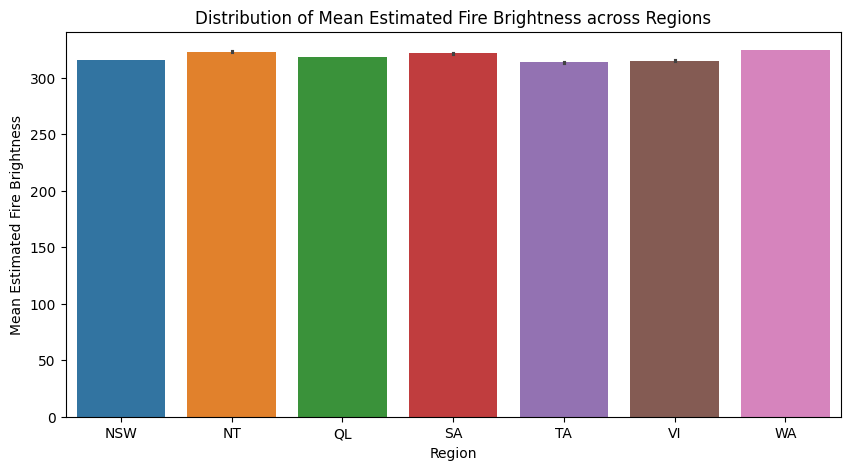

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size (6x6 inches)
plt.figure(figsize=(10, 5))

# Create a barplot to visualize the distribution of 'Mean_estimated_fire_brightness' across 'Region'
# - x='Region': The x-axis will represent different regions.
# - y='Mean_estimated_fire_brightness': The y-axis will represent the mean estimated fire brightness.
# - data=df: The data used for plotting is in the 'df' DataFrame.
# - hue='Region': Colors are grouped by 'Region', providing different colors for each region.
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=df, hue='Region')

# Add a title to the plot
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')

# Label the x-axis as 'Region'
plt.xlabel('Region')  # The x-axis shows different regions

# Label the y-axis as 'Mean Estimated Fire Brightness'
plt.ylabel('Mean Estimated Fire Brightness')  # The y-axis shows the mean brightness value

# Display the plot
plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()
```
</details>


In [55]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


<details>
    <summary>Click here for a Hint</summary>
First you will  be required to group the data on region and find the sum of count
</details>


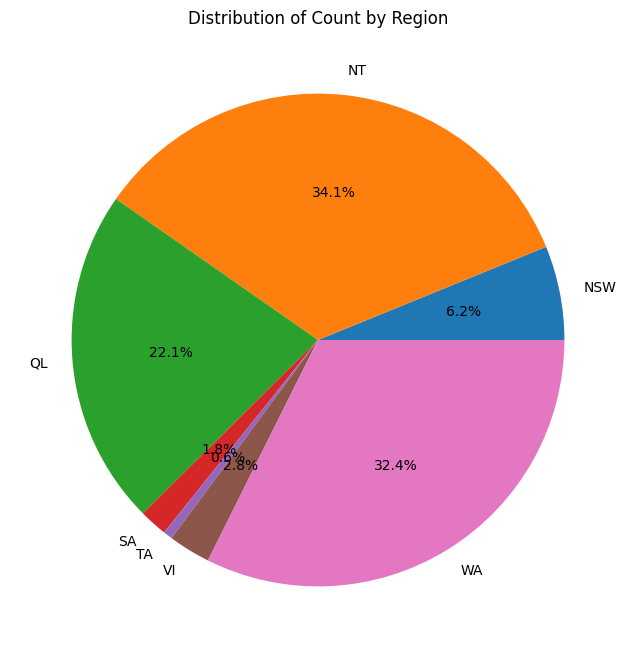

In [66]:
import matplotlib.pyplot as plt

# Step 1: Group the data by 'Region' and sum the 'Count' for each region
# This aggregates the count data for each region
pie_data = df.groupby('Region')['Count'].sum()

# Step 2: Reset the index to turn the resulting Series into a DataFrame for easier handling
pie_data = pie_data.reset_index()

# Step 3: Create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(8, 8))  # Create a square figure to ensure the pie chart looks good

# Step 4: Plot the pie chart
# - pie_data.Count: Values for each slice of the pie (sum of 'Count' per region)
# - labels=pie_data.Region: Labels for each slice, based on the 'Region' column
# - autopct='%1.1f%%': Shows the percentage of each slice with one decimal point
ax.pie(pie_data['Count'], labels=pie_data['Region'], autopct='%1.1f%%')

# Step 5: Set the aspect ratio to 'equal' to ensure the pie chart is drawn as a circle
ax.set_aspect('equal')  # Without this, the pie chart may appear as an oval if the figure is not square

# Step 6: Add a title to the pie chart for clarity
ax.set_title('Distribution of Count by Region')

# Step 7: Display the plot
plt.show()


<details>
    <summary>Click here for Solution</summary>

```python
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()
```
</details>


In [60]:
pie_data

,Region,Count
0,NSW,117412
1,NT,649430
2,QL,420882
3,SA,35160
4,TA,11473
5,VI,52473
6,WA,615968


### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI

remove the autopct fromm pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


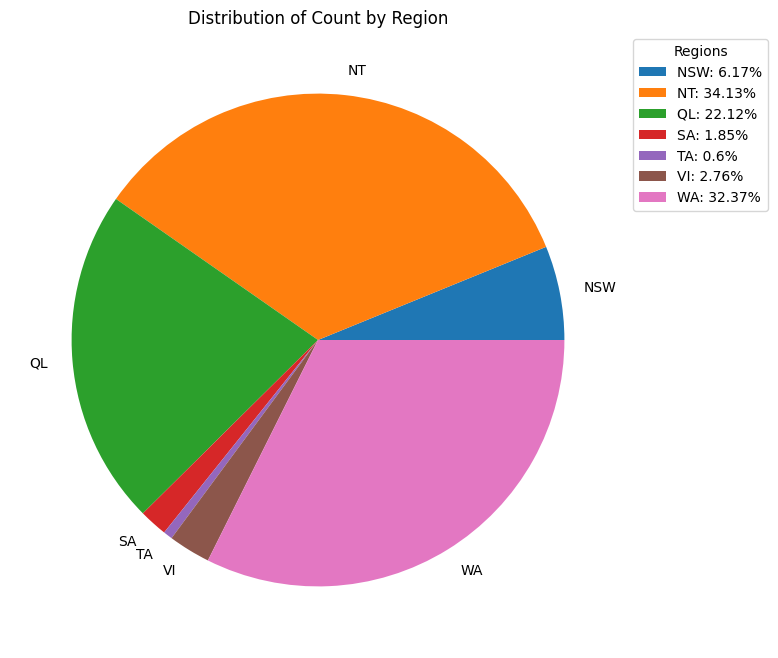

In [67]:
import matplotlib.pyplot as plt

# Step 1: Group the data by 'Region' and sum the 'Count' for each region
# This aggregates the count data for each region
pie_data = df.groupby('Region')['Count'].sum()

# Step 2: Reset the index to turn the resulting Series into a DataFrame for easier handling
pie_data = pie_data.reset_index()

# Step 3: Create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(8, 8))  # Create a square figure to ensure the pie chart looks good

# Step 4: Plot the pie chart without the autopct argument
# - pie_data['Count']: Values for each slice of the pie (sum of 'Count' per region)
# - labels=pie_data['Region']: Labels for each slice, based on the 'Region' column
ax.pie(pie_data['Count'], labels=pie_data['Region'])

# Step 5: Set the aspect ratio to 'equal' to ensure the pie chart is drawn as a circle
ax.set_aspect('equal')  # Without this, the pie chart may appear as an oval if the figure is not square

# Step 6: Add a title to the pie chart for clarity
ax.set_title('Distribution of Count by Region')

# Step 7: Add a legend with percentages for each region
# Create a list of tuples with the region and its percentage of the total count
legend_labels = [(i, round(k / pie_data['Count'].sum() * 100, 2)) for i, k in zip(pie_data['Region'], pie_data['Count'])]

# Format the legend labels to show both the region and percentage
formatted_labels = [f'{i}: {k}%' for i, k in legend_labels]

# Add the legend to the plot
plt.legend(formatted_labels, title='Regions', loc='upper left', bbox_to_anchor=(1, 1))

# Step 8: Display the plot
plt.show()


---


In [68]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


<details>
    <summary>Click here for a Hint</summary>
    Call plt.hist() and pass df['Mean_estimated_fire_brightness'] as x
</details>


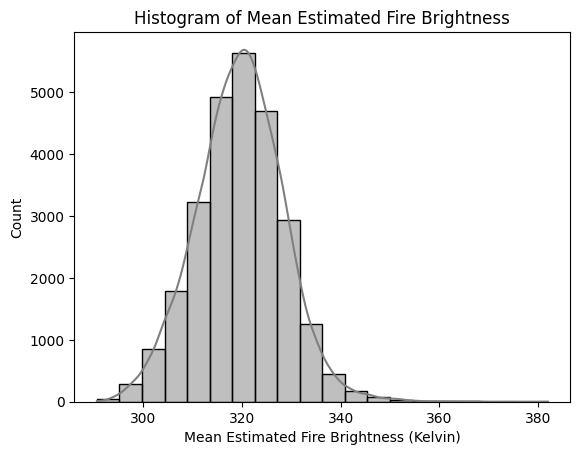

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a histogram with a kernel density estimate (KDE)
# - data=df: The data used for plotting is in the 'df' DataFrame.
# - x='Mean_estimated_fire_brightness': The variable to plot on the x-axis (mean estimated fire brightness).
# - bins=20: Specifies that the histogram will have 20 bins (intervals).
# - kde=True: Adds a kernel density estimate (smooth line) on top of the histogram to visualize the distribution more clearly.
# - color='grey': Specifies the color of the histogram and the KDE curve.
sns.histplot(data=df, x='Mean_estimated_fire_brightness', bins=20, kde=True, color='grey')

# Step 2: Add a label to the x-axis to explain the data represented
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')  # Label for the x-axis showing the units as Kelvin

# Step 3: Add a label to the y-axis to explain what it represents
plt.ylabel('Count')  # The y-axis shows the frequency (count) of occurrences in each bin

# Step 4: Add a title to the plot for context
plt.title('Histogram of Mean Estimated Fire Brightness')  # Title for the plot describing what is being visualized

# Step 5: Display the plot
plt.show()  # This renders the plot to the screen


<details>
    <summary>Click here for Solution</summary>

```python
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()
```
</details>


### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


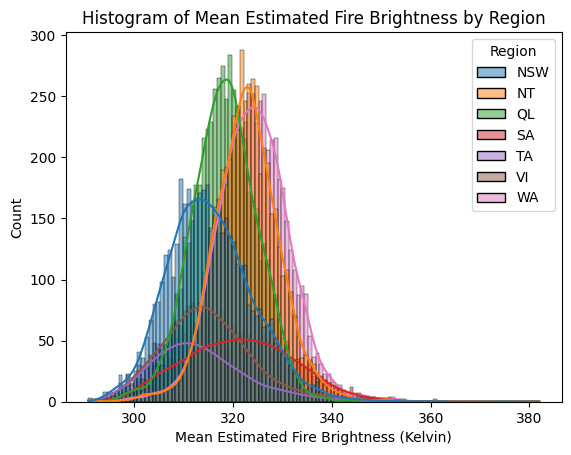

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a histogram with a kernel density estimate (KDE) and hue for different regions
# - data=df: The data used for plotting is in the 'df' DataFrame.
# - x='Mean_estimated_fire_brightness': The variable to plot on the x-axis (mean estimated fire brightness).
# - hue='Region': This adds color encoding for different regions, so each region will have a different color.
# - kde=True: Adds a kernel density estimate (smooth line) on top of the histogram to visualize the distribution more clearly.
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', kde=True)

# Step 2: Add a label to the x-axis to explain the data represented
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')  # Label for the x-axis showing the units as Kelvin

# Step 3: Add a label to the y-axis to explain what it represents
plt.ylabel('Count')  # The y-axis shows the frequency (count) of occurrences in each bin

# Step 4: Add a title to the plot for context
plt.title('Histogram of Mean Estimated Fire Brightness by Region')  # Title for the plot describing what is being visualized

# Step 5: Display the plot
plt.show()  # This renders the plot to the screen


<details>
    <summary>Click here for Solution</summary>

```python
# Creating a histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()
```
</details>


### looks better!, now include the parameter `multiple='stack'` in the histplot() and see the difference. Include labels and titles as well


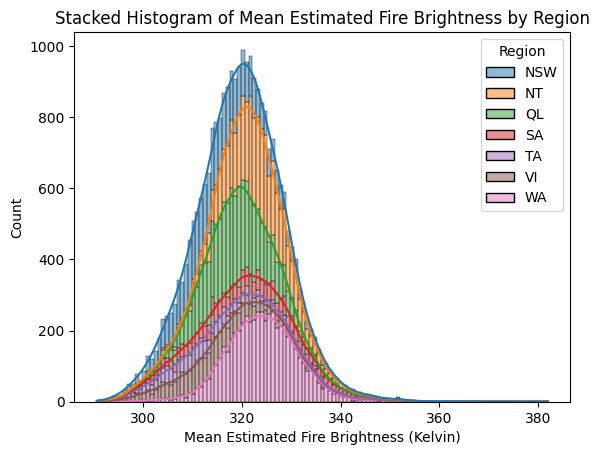

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a stacked histogram with a kernel density estimate (KDE) and hue for different regions
# - data=df: The data used for plotting is in the 'df' DataFrame.
# - x='Mean_estimated_fire_brightness': The variable to plot on the x-axis (mean estimated fire brightness).
# - hue='Region': This adds color encoding for different regions, so each region will have a different color.
# - kde=True: Adds a kernel density estimate (smooth line) on top of the histogram to visualize the distribution more clearly.
# - multiple='stack': This option stacks the bars from each region on top of each other, rather than plotting them side-by-side.
#   This allows you to compare the relative contribution of each region to the total count.
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', kde=True, multiple='stack')

# Step 2: Add a label to the x-axis to explain the data represented
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')  # Label for the x-axis showing the units as Kelvin

# Step 3: Add a label to the y-axis to explain what it represents
plt.ylabel('Count')  # The y-axis shows the frequency (count) of occurrences in each bin

# Step 4: Add a title to the plot for context
plt.title('Stacked Histogram of Mean Estimated Fire Brightness by Region')  # Title for the plot describing what is being visualized

# Step 5: Display the plot
plt.show()  # This renders the plot to the screen


<details>
    <summary>Click here for Solution</summary>

```python
# Creating a stacked histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the stacked histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
# Setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()
```
</details>


---


In [78]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


<details>
    <summary>Click here for a Hint</summary>
    Call plt.scatter() <br> or use the sns.scatterplot()
</details>


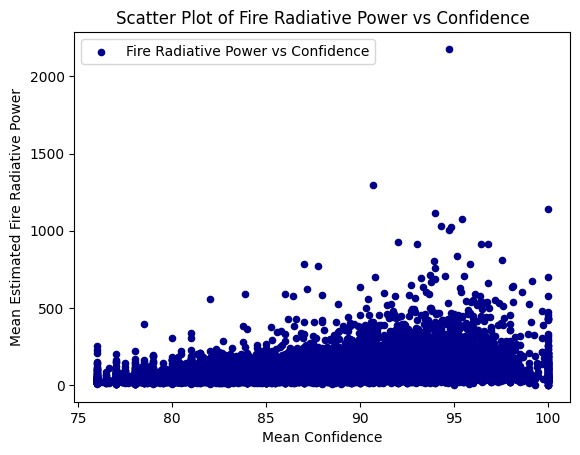

In [81]:
import matplotlib.pyplot as plt

# Step 1: Create a scatter plot of 'Mean_estimated_fire_radiative_power' vs 'Mean_confidence'
# - x='Mean_confidence': The variable to plot on the x-axis (mean confidence values).
# - y='Mean_estimated_fire_radiative_power': The variable to plot on the y-axis (mean estimated fire radiative power).
# - c='DarkBlue': Specifies the color of the points in the scatter plot (in this case, Dark Blue).
ax1 = df.plot.scatter(x='Mean_confidence', y='Mean_estimated_fire_radiative_power', c='DarkBlue')

# Step 2: Add a title to the plot
plt.title('Scatter Plot of Fire Radiative Power vs Confidence')  # Title describing the relationship between fire radiative power and confidence

# Step 3: Add axis labels
plt.xlabel('Mean Confidence')  # Label for the x-axis, explaining what the x-axis represents
plt.ylabel('Mean Estimated Fire Radiative Power')  # Label for the y-axis, explaining what the y-axis represents

# Step 4: Add a legend (even though the color is constant, it's a good practice to include it)
plt.legend(['Fire Radiative Power vs Confidence'], loc='upper left')  # Adds a legend indicating the plotted relationship

# Step 5: Display the plot
plt.show()  # This renders the plot to the screen


<details>
    <summary>Click here for Solution</summary>

```python
    # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
    plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
    sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
    plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
    plt.ylabel('Mean Confidence')
    plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
    plt.show()
```
</details>


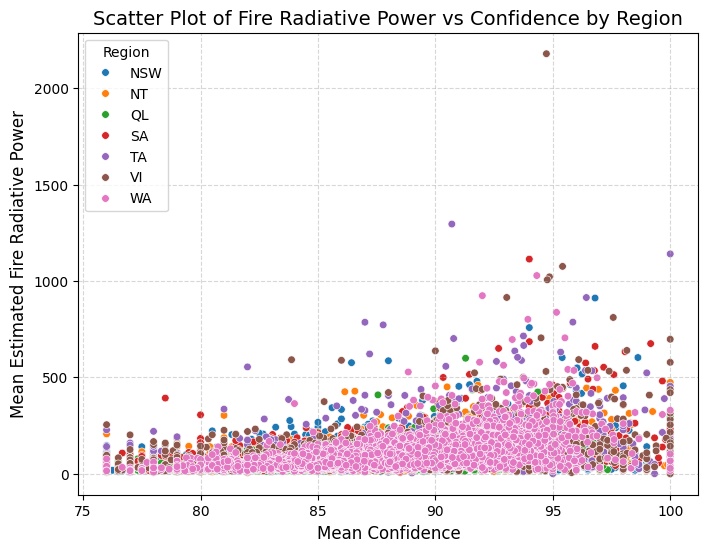

In [90]:
# Alternatively let's see a scatter plot in seaborn and hue the data by region
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set the figure size before plotting
plt.figure(figsize=(8, 6))  # Set the figure size for better readability

# Step 2: Create a scatter plot of 'Mean_confidence' vs 'Mean_estimated_fire_radiative_power'
# - data=df: The data for plotting is in the 'df' DataFrame.
# - x='Mean_confidence': The variable to plot on the x-axis (mean confidence values).
# - y='Mean_estimated_fire_radiative_power': The variable to plot on the y-axis (mean estimated fire radiative power).
# - hue='Region': Optionally, you can add a 'Region' column to color points by region for better visual comparison.
# - s=10: Adjusts the size of the scatter points for visibility.
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power', hue='Region', s=30)

# Step 3: Add a title to the plot for context
plt.title('Scatter Plot of Fire Radiative Power vs Confidence by Region', fontsize=14)  # Descriptive title

# Step 4: Add axis labels to clarify what each axis represents
plt.xlabel('Mean Confidence', fontsize=12)  # Label for the x-axis
plt.ylabel('Mean Estimated Fire Radiative Power', fontsize=12)  # Label for the y-axis

# Step 5: Add a legend for regions (if hue or style is used)
plt.legend(title='Region', loc='upper left')  # Adds a legend to explain the hue mapping

# Step 6: Optional: Add gridlines for easier visual inspection of data points
plt.grid(True, linestyle='--', alpha=0.5)  # Adds a grid for better readability of the plot

# Step 7: Display the plot
plt.show()  # Renders and displays the plot



---


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [91]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [97]:
australia_map = folium.Map(location=[-25, 135], zoom_start=4)
australia_map

In [98]:
# Create a FeatureGroup object called 'regions' to store the circle markers for incidents
regions = folium.map.FeatureGroup()  # This will be used to group markers together for easy map handling

# Loop through each latitude and longitude pair in the 'reg' DataFrame and create circle markers
for lat, lng in zip(reg.Lat, reg.Lon):  # The zip function combines two columns (latitude 'Lat' and longitude 'Lon') from the DataFrame 'reg'
    # Add each CircleMarker to the 'regions' FeatureGroup
    regions.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],  # The coordinates (latitude and longitude) for the CircleMarker
            radius=5,  # Define the size of the circle marker (in pixels)
            color='yellow',  # Set the border color of the circle to yellow
            fill=True,  # Ensure that the circle is filled with color
            fill_color='blue',  # Set the color of the filled part of the circle to blue
            fill_opacity=0.6  # Set the opacity (transparency) of the filled color to 60% (semi-transparent)
        )
    )

# After adding all the CircleMarkers to the 'regions' feature group, add it to the map 'australia_map'
australia_map.add_child(regions)  # This adds the entire 'regions' feature group with all markers to the map


<details>
    <summary>Click here for Solution</summary>

```python
# instantiate a feature group
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)
```
</details>


In [99]:
# Create a FeatureGroup object called 'regions' to store all the circle markers for incidents
regions = folium.map.FeatureGroup()  # This feature group will contain the CircleMarkers

# Loop through each latitude and longitude pair in the 'reg' DataFrame and add CircleMarkers
for lat, lng in zip(reg.Lat, reg.Lon):  # The zip function combines two columns: 'Lat' (latitude) and 'Lon' (longitude) from the 'reg' DataFrame
    # Add a CircleMarker to the 'regions' FeatureGroup for each latitude and longitude pair
    regions.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],  # Coordinates for the CircleMarker (latitude and longitude)
            radius=5,  # Size of the circle marker (in pixels)
            color='yellow',  # Set the border color of the circle to yellow
            fill=True,  # Fill the circle with color
            fill_color='blue',  # Set the fill color to blue
            fill_opacity=0.6  # Set the opacity (transparency) of the filled color to 60% (semi-transparent)
        )
    )

# Create a list of latitudes, longitudes, and labels (e.g., region names) to be displayed in pop-ups
latitudes = list(reg.Lat)  # Convert the 'Lat' column into a list
longitudes = list(reg.Lon)  # Convert the 'Lon' column into a list
labels = list(reg.region)  # Convert the 'region' column into a list (this column contains the labels for each region)

# Loop through the latitudes, longitudes, and labels to add markers with pop-up text
for lat, lng, label in zip(latitudes, longitudes, labels):
    # Add a Marker for each latitude and longitude with a pop-up showing the region label
    folium.Marker([lat, lng], popup=label).add_to(australia_map)

# After adding the CircleMarkers with incidents, add the 'regions' FeatureGroup to the map
australia_map.add_child(regions)  # Adds the group of circle markers to the map


---


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


#### Copyright © 2023 IBM Corporation. All rights reserved.
```{toggle}## Change Log
```


```{toggle}|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```

```{toggle}|-|-|-|-|
```
```{toggle}|2023-06-281|0.2|Dr. Pooja|Initial Lab Creation|
```
```{toggle}|2023-05-01|0.1|Shengkai|Create Lab Template|
```


# Exercise: get a geojson file and plot it on a folium map


In [130]:
# Importing the necessary libraries
import folium  # Folium is a Python library used for creating interactive maps.
import requests  # Requests library is used to send HTTP requests to retrieve data from a URL.

# Step 1: Download the GeoJSON file for Australia (or use a local GeoJSON file path)
# The URL provided points to a GeoJSON file of Australian states.
australia_geo_url = 'https://raw.githubusercontent.com/rowanhogan/australian-states/5526d2a0f479be4847f220c7dcb2ec5a48d5aff0/states.geojson'

# Sending a GET request to fetch the GeoJSON data from the URL.
response = requests.get(australia_geo_url)

# Step 2: Ensure the request was successful by checking the status code
# Status code 200 means the request was successful.
if response.status_code == 200:
    # If successful, parse the response into a Python dictionary (GeoJSON format).
    australia_geo = response.json()
else:
    # If the request failed, print a message to notify the user.
    print("Failed to download GeoJSON.")

# Step 3: Create a map centered on Australia using Folium
# The 'location' is set to [-25, 135], which roughly corresponds to the center of Australia.
# 'zoom_start=4' gives an initial zoom level, meaning the map starts zoomed out to show the entire continent.
australia_map = folium.Map(location=[-25, 135], zoom_start=4)

# Step 4: Add the GeoJSON data to the map
# The GeoJSON data (stored in the 'australia_geo' variable) is added to the map using the folium.GeoJson() method.
# This will display the boundaries of each Australian state/territory on the map.
folium.GeoJson(australia_geo).add_to(australia_map)

# Step 5: Display the map
# This line outputs the map. If you're using a Jupyter notebook, it will display directly in the notebook.
australia_map



In [132]:
# This code also interacts with the Geojson and extract the region names
import folium
import requests

# Step 1: Download the GeoJSON file for Australia (or use a local GeoJSON file path)
australia_geo_url = 'https://raw.githubusercontent.com/rowanhogan/australian-states/5526d2a0f479be4847f220c7dcb2ec5a48d5aff0/states.geojson'
response = requests.get(australia_geo_url)

# Ensure the request was successful
if response.status_code == 200:
    australia_geo = response.json()
else:
    print("Failed to download GeoJSON.")

# Step 2: Extract state names from the GeoJSON
state_names = []

# Loop through each feature in the GeoJSON
for feature in australia_geo['features']:
    # Access the 'STATE_NAME' from the 'properties' field
    state_name = feature['properties']['STATE_NAME']
    state_names.append(state_name)

# Print out the state names to verify
print(state_names)

# Step 3: Create a map centered on Australia
australia_map = folium.Map(location=[-25, 135], zoom_start=4)

# Step 4: Add the GeoJSON data to the map
folium.GeoJson(australia_geo).add_to(australia_map)

# Step 5: Display the map
australia_map


['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 'Tasmania', 'Northern Territory', 'Australian Capital Territory']
